## Receiver Operating Characteristic (ROC) Analysis
#### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

In [12]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', gamma ='scale', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
false_pos_rt = dict()
true_pos_rt = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pos_rt[i], true_pos_rt[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(false_pos_rt[i], true_pos_rt[i])

# Compute micro-average ROC curve and ROC area
false_pos_rt["micro"], true_pos_rt["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(false_pos_rt["micro"], true_pos_rt["micro"])

Automatically created module for IPython interactive environment


In [10]:
y_score.shape

(75, 3)

In [11]:
y_score

array([[-0.56526839, -0.68478736, -0.38280186],
       [-0.4335187 , -0.73602029, -0.43805949],
       [-0.31907653, -0.75968022, -0.50976804],
       [-0.5823866 , -0.60974657, -0.44951161],
       [-0.33975225, -0.65571311, -0.62993711],
       [-0.52276595, -0.66441139, -0.44733057],
       [-0.3487469 , -0.65731602, -0.61991117],
       [-0.52817769, -0.57364349, -0.54826504],
       [-0.4262719 , -0.6618737 , -0.54745108],
       [-0.50744302, -0.64290021, -0.47692324],
       [-0.48360558, -0.65835894, -0.48701596],
       [-0.45124619, -0.74278231, -0.39719017],
       [-0.45799336, -0.70599685, -0.45635374],
       [-0.37745031, -0.7078086 , -0.5103498 ],
       [-0.53130864, -0.64186183, -0.46481714],
       [-0.30076941, -0.71463108, -0.59432521],
       [-0.5707699 , -0.62721113, -0.43934331],
       [-0.52626409, -0.60008589, -0.52063122],
       [-0.28605319, -0.80026836, -0.49894952],
       [-0.38535755, -0.77746727, -0.43172669],
       [-0.55828032, -0.59996795, -0.482

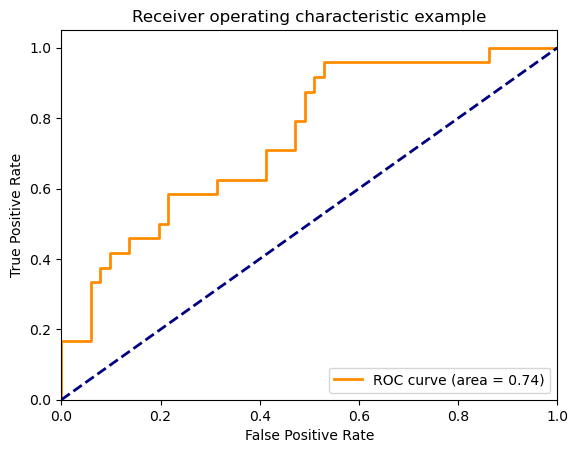

In [13]:
plt.figure()
lw = 2
plt.plot(false_pos_rt[2], true_pos_rt[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

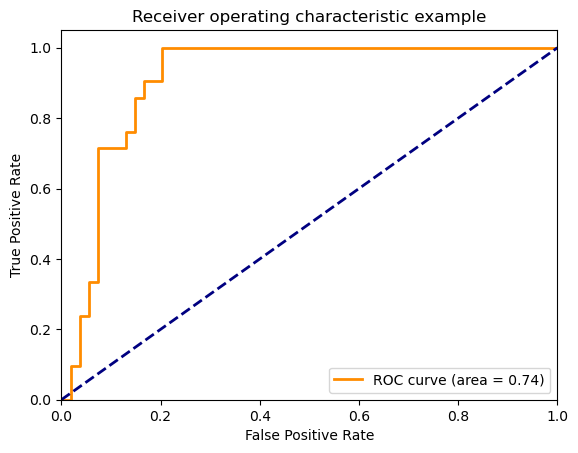

In [15]:
plt.figure()
lw = 2
plt.plot(false_pos_rt[0], true_pos_rt[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


